In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tranformed_data.csv', na_values = '?')
df_clean = df.drop(['encounter_id','patient_nbr'],axis=1)
df_clean = df_clean.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [3]:
X = df_clean.drop(['readmitted'], axis=1)
y = df_clean['readmitted']

In [4]:
numeric_features_raw = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features_raw = X.select_dtypes(include=['object']).columns

In [5]:
numeric_features_raw

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [6]:
categorical_features_raw

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'diag_new1',
       'diag_new2', 'diag_new3'],
      dtype='object')

In [7]:
categorical_features = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
        'race', 'gender', 'age', 'max_glu_serum',
        'diag_new1','diag_new2', 'diag_new3',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [8]:
numeric_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'] 

In [9]:
X_1 = pd.concat([X[categorical_features], X[numeric_features]], axis=1)

In [10]:
transformed_X = pd.get_dummies(data=X_1, columns=categorical_features)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.20,random_state=4444)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)

In [13]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test) 

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6364795267961858

In [15]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
num_lab_procedures,0.078011
num_medications,0.070695
time_in_hospital,0.052099
number_inpatient,0.047953
number_diagnoses,0.037520
num_procedures,0.035995
number_outpatient,0.018166
number_emergency,0.014989
diag_new3_Circulatory,0.014046
gender_Female,0.013793


In [169]:
y_pred_proba = rf.predict_proba(X_train) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022484776208>]],
      dtype=object)

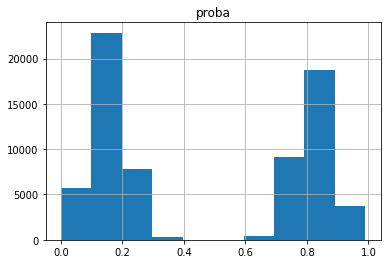

In [170]:
proba = pd.DataFrame(y_pred_proba[:,1])
proba.columns = ['proba']
proba.hist()

In [171]:
#X_train = pd.concat([X_train, proba], axis=1)

In [172]:
#X_train.head()

In [173]:
#We set the thershold
proba['risk'] = np.where(proba['proba'] > 0.6, 3, 2)
proba['risk'] = np.where(proba['proba'] < 0.05, 1, proba['risk'])

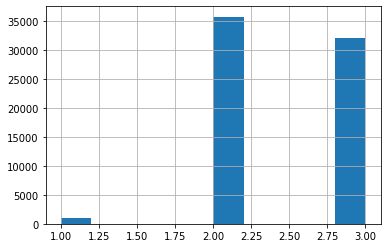

In [174]:
proba['risk'].hist()

In [175]:
proba.head()

,proba,risk
0,0.805,3
1,0.135,2
2,0.880,3
3,0.705,3
4,0.795,3


In [176]:
proba = proba.drop('proba', axis=1)
proba.head()

,risk
0,3
1,2
2,3
3,3
4,3


In [177]:
y_train_risk = proba
y_train_risk['risk'].value_counts()

2    35681
3    31992
1      964
Name: risk, dtype: int64

In [178]:
rf1 = RandomForestClassifier(n_estimators = 200)

In [26]:
rf1.fit(X_train,y_train_risk)
y_pred1 = rf1.predict(X_test) 

C:\Users\wh_el\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [27]:
y_pred1 = pd.DataFrame(y_pred1,columns=['risk'])

In [28]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace = True, drop = True)

In [29]:
risk_analysis = pd.concat([pd.DataFrame(y_pred1), pd.DataFrame(y_test)], axis=1)

In [30]:
high_risk_test = risk_analysis[risk_analysis['risk'] == 3]
med_risk_test = risk_analysis[risk_analysis['risk'] == 2]
low_risk_test = risk_analysis[risk_analysis['risk'] == 1]

In [31]:
high_risk_test['readmitted'].value_counts()

1    5003
0    2993
Name: readmitted, dtype: int64

In [32]:
5039/len(high_risk_test)

0.6301900950475238

### 62.6% in the high_risk_test will be readmitted

In [33]:
med_risk_test['readmitted'].value_counts()

0    7356
1    4118
Name: readmitted, dtype: int64

In [34]:
4082/len(med_risk_test)

0.3557608506187903

### 36% in the med_risk_test will be readmitted

In [35]:
low_risk_test['readmitted'].value_counts()

0    141
Name: readmitted, dtype: int64

### 0% in the low_risk_test data!

In [36]:
y_test['readmitted'].value_counts()

0    10490
1     9121
Name: readmitted, dtype: int64

## Round 2 of RF to Cross validate

In [37]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.20,random_state=2)

In [38]:
X_train['gender_Unknown/Invalid']

91020    0
62024    0
79588    0
38099    0
43408    0
        ..
31019    0
44566    0
95816    0
72173    0
89256    0
Name: gender_Unknown/Invalid, Length: 78442, dtype: uint8

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)

In [40]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test) 

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6353067156187854

In [42]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
num_lab_procedures,0.077672
num_medications,0.070935
time_in_hospital,0.051924
number_inpatient,0.048337
number_diagnoses,0.037480
num_procedures,0.035325
number_outpatient,0.018076
number_emergency,0.015085
diag_new3_Circulatory,0.014239
gender_Female,0.013618


In [43]:
y_pred_proba = rf.predict_proba(X_train) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224B7BB1AC8>]],
      dtype=object)

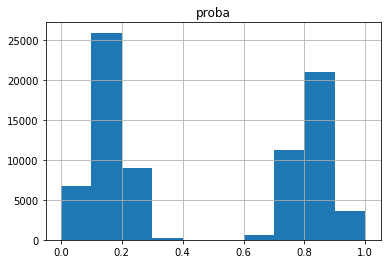

In [44]:
proba = pd.DataFrame(y_pred_proba[:,1])
proba.columns = ['proba']
proba.hist()

In [45]:
#X_train = pd.concat([X_train, proba], axis=1)

In [46]:
#X_train.head()

In [47]:
#We set the thershold
proba['risk'] = np.where(proba['proba'] > 0.6, 3, 2)
proba['risk'] = np.where(proba['proba'] < 0.05, 1, proba['risk'])

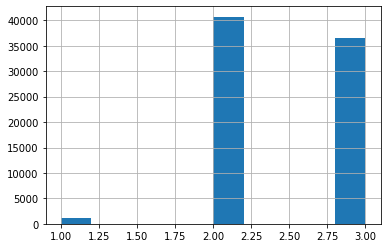

In [48]:
proba['risk'].hist()

In [49]:
proba.head()

,proba,risk
0,0.155,2
1,0.755,3
2,0.090,2
3,0.080,2
4,0.750,3


In [50]:
proba = proba.drop('proba', axis=1)
proba.head()

,risk
0,2
1,3
2,2
3,2
4,3


In [51]:
y_train_risk = proba
y_train_risk['risk'].value_counts()

2    40712
3    36520
1     1210
Name: risk, dtype: int64

In [52]:
rf1 = RandomForestClassifier(n_estimators = 200)

In [53]:
rf1.fit(X_train,y_train_risk)
y_pred1 = rf1.predict(X_test) 

C:\Users\wh_el\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [54]:
y_pred1 = pd.DataFrame(y_pred1,columns=['risk'])

In [55]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace = True, drop = True)

In [56]:
risk_analysis = pd.concat([pd.DataFrame(y_pred1), pd.DataFrame(y_test)], axis=1)

In [57]:
high_risk_test = risk_analysis[risk_analysis['risk'] == 3]
med_risk_test = risk_analysis[risk_analysis['risk'] == 2]
low_risk_test = risk_analysis[risk_analysis['risk'] == 1]

In [58]:
high_risk_test['readmitted'].value_counts()

1    4986
0    2950
Name: readmitted, dtype: int64

In [59]:
4937/len(high_risk_test)

0.622101814516129

### 62.6% in the high_risk_test will be readmitted

In [60]:
med_risk_test['readmitted'].value_counts()

0    7276
1    4206
Name: readmitted, dtype: int64

In [61]:
4255/len(med_risk_test)

0.37058003832085

### 37% in the med_risk_test will be readmitted

In [62]:
low_risk_test['readmitted'].value_counts()

0    192
1      1
Name: readmitted, dtype: int64

In [63]:
1/169

0.005917159763313609

### 0.5% in the low_risk_test data

In [64]:
y_test['readmitted'].value_counts()

0    10418
1     9193
Name: readmitted, dtype: int64

## RF Round 3

In [65]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.30,random_state=1234)

In [66]:
X_train['gender_Unknown/Invalid']

27632    0
12082    0
60136    0
32319    0
61141    0
        ..
89460    0
60620    0
34086    0
58067    0
92975    0
Name: gender_Unknown/Invalid, Length: 68637, dtype: uint8

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)

In [68]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test) 

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6343486537938536

In [70]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(20)

,importance
num_lab_procedures,0.077116
num_medications,0.070256
time_in_hospital,0.052150
number_inpatient,0.048369
number_diagnoses,0.037595
num_procedures,0.034991
number_outpatient,0.018297
number_emergency,0.015095
diag_new3_Circulatory,0.014150
diag_new2_Circulatory,0.014076


In [71]:
y_pred_proba_rf = rf.predict_proba(X_train) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022480A18CC8>]],
      dtype=object)

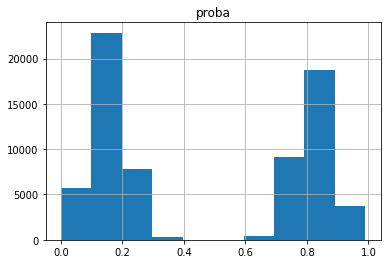

In [72]:
proba = pd.DataFrame(y_pred_proba_rf[:,1])
proba.columns = ['proba']
proba.hist()

In [73]:
#X_train = pd.concat([X_train, proba], axis=1)

In [74]:
#X_train.head()

In [75]:
#We set the thershold
proba['risk'] = np.where(proba['proba'] > 0.6, 3, 2)
proba['risk'] = np.where(proba['proba'] < 0.05, 1, proba['risk'])

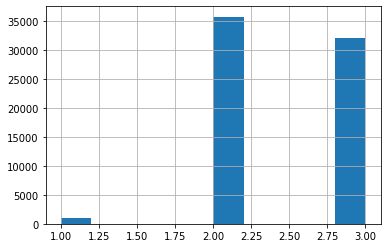

In [76]:
proba['risk'].hist()

In [77]:
proba.head()

,proba,risk
0,0.805,3
1,0.135,2
2,0.880,3
3,0.705,3
4,0.795,3


In [78]:
proba = proba.drop('proba', axis=1)
proba.head()

,risk
0,3
1,2
2,3
3,3
4,3


In [79]:
y_train_risk = proba
y_train_risk['risk'].value_counts()

2    35681
3    31992
1      964
Name: risk, dtype: int64

In [80]:
rf1 = RandomForestClassifier(n_estimators = 200)

In [81]:
rf1.fit(X_train,y_train_risk)
y_pred1 = rf1.predict(X_test) 

C:\Users\wh_el\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [82]:
y_pred1 = pd.DataFrame(y_pred1,columns=['risk'])

In [83]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace = True, drop = True)

In [84]:
risk_analysis = pd.concat([pd.DataFrame(y_pred1), pd.DataFrame(y_test)], axis=1)

In [85]:
high_risk_test = risk_analysis[risk_analysis['risk'] == 3]
med_risk_test = risk_analysis[risk_analysis['risk'] == 2]
low_risk_test = risk_analysis[risk_analysis['risk'] == 1]

In [86]:
high_risk_test['readmitted'].value_counts()

1    7344
0    4479
Name: readmitted, dtype: int64

In [87]:
7339/len(high_risk_test)

0.6207392370802672

### 62.6% in the high_risk_test will be readmitted

In [88]:
med_risk_test['readmitted'].value_counts()

0    11006
1     6379
Name: readmitted, dtype: int64

In [89]:
6383/len(med_risk_test)

0.36715559390278973

### 37% in the med_risk_test will be readmitted

In [90]:
low_risk_test['readmitted'].value_counts()

0    208
Name: readmitted, dtype: int64

In [91]:
1/213

0.004694835680751174

### 0.4% in the low_risk_test data

In [92]:
y_test['readmitted'].value_counts()

0    15693
1    13723
Name: readmitted, dtype: int64

# Ridge Regression 

In [103]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [94]:
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.30,random_state=1234)

In [95]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1,3,5,10,15,20],normalize = True).fit(X_train, y_train)

In [96]:
clf.fit(X_train,y_train)
y_pred_proba_logit = clf.predict(X_train) 

In [97]:
clf.alpha_

0.01

In [105]:
clf = Ridge(alpha=0.01,normalize = True)

In [106]:
clf.fit(X_train,y_train)
y_pred_proba_logit = clf.predict(X_train) 

In [107]:
threshold = 0.5

y_pred = (y_pred_proba_logit >= threshold).astype('int')

In [108]:
#training set accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_train)

0.6342060404737969

In [109]:
#Coefficients
feature_coefficients = pd.DataFrame(clf.coef_,
                                   index = X_train.columns,
                                    columns=['coefficients']).sort_values('coefficients', ascending=False)
feature_coefficients

,coefficients
tolazamide_Up,0.490184
miglitol_Up,0.466199
chlorpropamide_Up,0.277338
miglitol_Down,0.250666
discharge_disposition_id_12,0.248172
...,...
discharge_disposition_id_14,-0.415223
admission_source_id_13,-0.424470
glyburide-metformin_Down,-0.462902
discharge_disposition_id_20,-0.480353


In [110]:
#Obtain all the non-zero coefficient features
zero_coef_features = list(feature_coefficients[feature_coefficients['coefficients']==0].index)
non_zero_coef_features = final_list= list(set(list(feature_coefficients.index)).difference(set(zero_coef_features)))

In [181]:
y_pred

array([1, 0, 1, ..., 0, 1, 1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022485D1A388>]],
      dtype=object)

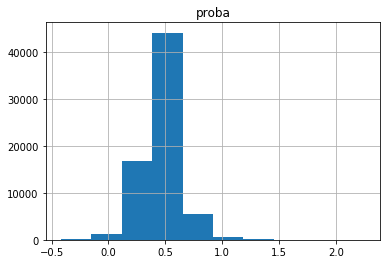

In [189]:
proba = pd.DataFrame(y_pred_proba_logit)
proba.columns = ['proba']
proba.hist()

In [190]:
proba.shape

(68637, 1)

In [191]:
#We set the thershold
proba['risk'] = np.where(proba['proba'] > 0.5, 3, 2)
proba['risk'] = np.where(proba['proba'] < 0.2, 1, proba['risk'])

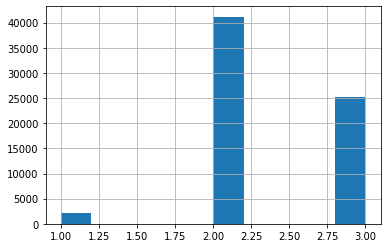

In [192]:
proba['risk'].hist()

In [193]:
proba.head()

,proba,risk
0,0.522249,3
1,0.370528,2
2,0.555603,3
3,0.339654,2
4,0.445597,2


In [194]:
proba = proba.drop('proba', axis=1)
proba.head()

,risk
0,3
1,2
2,3
3,2
4,2


In [195]:
y_train_risk = proba
y_train_risk['risk'].value_counts()

2    41171
3    25259
1     2207
Name: risk, dtype: int64

### Now we want to build a logistic regression using the new y_train with multiple risk levels

In [129]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [130]:
X_train.shape

(68637, 195)

In [198]:
clf1.fit(X_train[non_zero_coef_features],y_train_risk)
y_pred1 = clf1.predict(X_test[non_zero_coef_features]) 

C:\Users\wh_el\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wh_el\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [199]:
y_pred1

array([3, 3, 3, ..., 2, 2, 3])

In [200]:
y_pred1 = pd.DataFrame(y_pred1,columns=['risk'])

In [201]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace = True, drop = True)

In [202]:
risk_analysis = pd.concat([pd.DataFrame(y_pred1), pd.DataFrame(y_test)], axis=1)

In [203]:
high_risk_test = risk_analysis[risk_analysis['risk'] == 3]
med_risk_test = risk_analysis[risk_analysis['risk'] == 2]
low_risk_test = risk_analysis[risk_analysis['risk'] == 1]

In [204]:
high_risk_test['readmitted'].value_counts()

1    6437
0    3979
Name: readmitted, dtype: int64

In [205]:
6439/len(high_risk_test)

0.6181835637480799

### 61.8% in the high_risk_test will be readmitted

In [206]:
med_risk_test['readmitted'].value_counts()

0    11425
1     7281
Name: readmitted, dtype: int64

In [207]:
7280/len(med_risk_test)

0.3891799422645141

### 39% in the med_risk_test will be readmitted

In [208]:
low_risk_test['readmitted'].value_counts()

0    289
1      5
Name: readmitted, dtype: int64

In [209]:
4/len(low_risk_test)

0.013605442176870748

### 1% in the low_risk_test data

## We use the classification labels from RF CV1 to do analysis based on demographics

In [210]:
high_risk_test.head()

,risk,readmitted
0,3,1
1,3,1
2,3,0
3,3,1
4,3,1


In [211]:
med_risk_test.head()

,risk,readmitted
6,2,1
7,2,0
8,2,0
10,2,1
11,2,1


In [212]:
low_risk_test.head()

,risk,readmitted
117,1,0
197,1,0
313,1,0
366,1,0
383,1,0


In [213]:
risk_cat = pd.concat([high_risk_test, med_risk_test,low_risk_test], axis=0)

In [214]:
risk_cat.head()

,risk,readmitted
0,3,1
1,3,1
2,3,0
3,3,1
4,3,1


In [215]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_1,y,test_size=0.20,random_state=4444)

In [216]:
X_test_1 = X_test_1.reset_index()
X_test_1.head()

,index,admission_type_id,discharge_disposition_id,admission_source_id,race,gender,age,max_glu_serum,diag_new1,diag_new2,...,change,diabetesMed,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,89953,2,1,4,Caucasian,Male,[60-70),None,Circulatory,Circulatory,...,Ch,Yes,2,13,0,11,0,0,0,9
1,53331,3,1,1,Caucasian,Male,[50-60),None,Mental disorders,Mental disorders,...,Ch,Yes,12,53,0,12,0,0,0,5
2,8548,5,3,17,Caucasian,Male,[80-90),Norm,Circulatory,Circulatory,...,No,Yes,7,22,1,13,2,0,0,5
3,6666,1,6,7,AfricanAmerican,Male,[70-80),None,Circulatory,Diabetes,...,No,Yes,6,52,3,6,0,1,1,6
4,40152,1,6,7,Caucasian,Male,[70-80),None,Circulatory,Genitourinary,...,Ch,Yes,4,59,0,19,3,1,1,9


In [217]:
BIG_X = pd.concat([risk_cat, X_test_1], axis=1)

In [218]:
BIG_X.shape

(29416, 47)

In [219]:
BIG_X['risk'].value_counts()

2    18706
3    10416
1      294
Name: risk, dtype: int64

In [220]:
low_risk_people = BIG_X[BIG_X['risk']==1]
med_risk_people = BIG_X[BIG_X['risk']==2]
high_risk_people = BIG_X[BIG_X['risk']==3]

In [221]:
low_risk_people['race'].value_counts()

Caucasian          149
AfricanAmerican     30
Asian                4
Other                4
Name: race, dtype: int64

In [222]:
med_risk_people['race'].value_counts()

Caucasian          9552
AfricanAmerican    2371
Hispanic            243
Other               205
Asian                63
Name: race, dtype: int64

In [223]:
high_risk_people['race'].value_counts()

Caucasian          5338
AfricanAmerican    1337
Hispanic            163
Other               102
Asian                50
Name: race, dtype: int64

In [224]:
low_risk_people['age'].value_counts()

[70-80)     63
[60-70)     36
[50-60)     34
[80-90)     30
[40-50)     16
[30-40)      4
[90-100)     2
[20-30)      2
Name: age, dtype: int64

In [225]:
med_risk_people['age'].value_counts()

[70-80)     3160
[60-70)     2801
[50-60)     2193
[80-90)     2029
[40-50)     1143
[30-40)      486
[90-100)     365
[20-30)      190
[10-20)       60
[0-10)         7
Name: age, dtype: int64

In [226]:
high_risk_people['age'].value_counts()

[70-80)     1809
[60-70)     1551
[50-60)     1217
[80-90)     1189
[40-50)      661
[30-40)      253
[90-100)     176
[20-30)       99
[10-20)       31
[0-10)         4
Name: age, dtype: int64

In [227]:
low_risk_people['gender'].value_counts()

Female    103
Male       84
Name: gender, dtype: int64

In [228]:
med_risk_people['gender'].value_counts()

Female    6638
Male      5796
Name: gender, dtype: int64

In [229]:
high_risk_people['gender'].value_counts()

Female    3778
Male      3212
Name: gender, dtype: int64